<a href="https://colab.research.google.com/github/nicoavilan/Visualizacion-de-datos/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos descargados en 

[PhysioBank ATM](https://archive.physionet.org/cgi-bin/atm/ATM)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
url = "https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/ECG.csv"
df = pd.read_csv(url)
df

,'Elapsed time','I','II','III','AVR','AVL','AVF','V1','V2','V3','V4','V5','V6'
0,'hh:mm:ss.mmm','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV','mV'
1,'0:00.000',0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,'0:00.001',0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,'0:00.002',0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,'0:00.003',0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,'0:09.995',0.008,0.845,0.838,-0.425,-0.415,0.840,-0.685,-1.593,-0.790,2.275,1.863,1.135
9997,'0:09.996',0.023,0.630,0.608,-0.325,-0.293,0.618,-0.685,-1.445,-0.803,2.198,1.748,1.035
9998,'0:09.997',0.048,0.403,0.355,-0.225,-0.153,0.378,-0.713,-1.275,-0.813,2.040,1.568,0.903
9999,'0:09.998',0.058,0.388,0.330,-0.223,-0.135,0.358,-0.723,-1.253,-0.803,2.008,1.538,0.885


Elimino la fila que no tiene valores numéricos

In [ ]:
df = df.drop(labels=0, axis = 0)
df.head()

,'Elapsed time','I','II','III','AVR','AVL','AVF','V1','V2','V3','V4','V5','V6'
1,'0:00.000',0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,'0:00.001',0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,'0:00.002',0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,'0:00.003',0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,'0:00.004',0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185


Quito las comillas extra de los nombres en las columnas

In [ ]:
df.columns = ['Elapsed_time', 'I', 'II', 'III', 'AVR', 'AVL', 'AVF','V1', 'V2', 'V3', 'V4', 'V5', 'V6']
df.head()

,Elapsed_time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,'0:00.000',0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,'0:00.001',0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,'0:00.002',0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,'0:00.003',0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,'0:00.004',0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185


Exploro los el formato de los datos de la columna

In [ ]:
print(df.loc[1,"II"])
type(df.loc[1,"II"])

0.260


str

Cambio el formato a float

In [ ]:
df["II"] = pd.to_numeric(df["II"], downcast="float", errors='coerce')

Verifico que los datos tengan el formato deseado

In [ ]:
print(df.loc[1,"II"])
type(df.loc[1,"II"])

0.26


numpy.float32

Verifico el formato de la columna "Elapsed_time"

In [ ]:
print(df.loc[1,"Elapsed_time"])
type(df.loc[1,"Elapsed_time"])

'0:00.000'


str

Quito las comillas del registro de tiempo

In [ ]:
df["Elapsed_time"] = df["Elapsed_time"].str.replace("'","", regex = False)
df.head()

,Elapsed_time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,0:00.000,0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,0:00.001,0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,0:00.002,0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,0:00.003,0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,0:00.004,0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185


Verifico el registro de la columna "Elapsed_time"

In [ ]:
print(df.loc[1,"Elapsed_time"])
type(df.loc[1,"Elapsed_time"])

0:00.000


str

Cambio el formato a "Elapsed_time"

In [ ]:
df["Elapsed_time"] = pd.to_datetime(df["Elapsed_time"], format = "%M:%S.%f")
df.head()

,Elapsed_time,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
1,1900-01-01 00:00:00.000,0.080,0.260,0.180,-0.170,-0.050,0.220,0.010,0.330,0.488,0.505,0.323,0.215
2,1900-01-01 00:00:00.001,0.075,0.255,0.180,-0.165,-0.050,0.218,0.010,0.325,0.483,0.495,0.320,0.215
3,1900-01-01 00:00:00.002,0.070,0.248,0.178,-0.158,-0.053,0.213,0.010,0.315,0.465,0.473,0.308,0.210
4,1900-01-01 00:00:00.003,0.073,0.245,0.175,-0.158,-0.050,0.210,0.008,0.303,0.435,0.448,0.288,0.195
5,1900-01-01 00:00:00.004,0.075,0.248,0.173,-0.160,-0.048,0.210,0.005,0.298,0.423,0.438,0.278,0.185


Visualización de los datos

In [ ]:
df.loc[df["II"].idxmax(),"Elapsed_time"]]

In [ ]:
df["II"].idxmax()

619

In [ ]:
df.loc[df["II"].idxmax(),"Elapsed_time"]

Timestamp('1900-01-01 00:00:00.618000')

In [ ]:
df.loc[df["II"].idxmax(),"Elapsed_time"]

Timestamp('1900-01-01 00:00:00.618000')

In [ ]:
df["II"].max()

1.45

In [ ]:
(df.loc[df["II"].idxmax(),"Elapsed_time"].time(), df["II"].max())

(datetime.time(0, 0, 0, 618000), 1.45)

In [ ]:
df.loc[df["II"].idxmax(),"Elapsed_time"], df["II"].max()

(Timestamp('1900-01-01 00:00:00.618000'), 1.45)

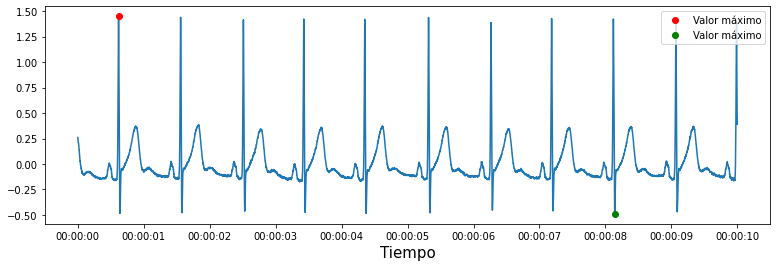

In [ ]:
plt.figure(figsize = (13,4))
plt.plot(df["Elapsed_time"],df["II"])
plt.plot(df.loc[df["II"].idxmax(),"Elapsed_time"], df["II"].max(), "ro", label= "Valor máximo")
plt.plot(df.loc[df["II"].idxmin(),"Elapsed_time"], df["II"].min(), "go", label= "Valor máximo")
plt.xlabel("Tiempo", size= 15)
plt.legend(loc = 1)
plt.show()

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
x = df["Elapsed_time"].values
y = df["II"].values
N = len(df)

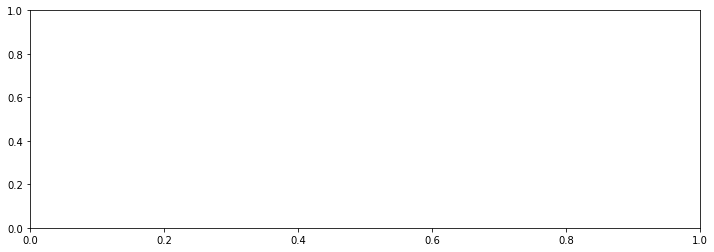

In [ ]:
fig=plt.figure(figsize= (12,4))
ax=fig.gca()

def actualizar(i):
  ax.clear()

  ax.plot(x[:i], y[:i],'-')
  ax.set_title("Electrocardiograma", fontweight="bold", size = 20)
  ax.set_xlabel("Tiempo", fontweight="bold", size = 15)
  ax.plot(x[i],  y[i],'o',markersize=10,color='r')

In [ ]:
ani=animation.FuncAnimation(fig, actualizar, range(0,N,10), interval=30)
HTML(ani.to_html5_video())

La animación se observa al ejecutar el código, GitHub no la genera automáticamente.